<a href="https://colab.research.google.com/github/akshitha29goud/FMML-Pojects-and-Labs/blob/main/Copy_of_STP_Module_1_Lab_2_Machine_Learning_terms_and_metrics_by_Om.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning terms and metrics

Module 1, Lab 2

In this lab, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

## Common Machine Learning Evaluation Metrics

### Classification Metrics

**1. Accuracy**
$$\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}} = \frac{TP + TN}{TP + TN + FP + FN}$$

**2. Precision** (How many predicted positives are actually positive?)
$$\text{Precision} = \frac{TP}{TP + FP}$$

**3. Recall/Sensitivity** (How many actual positives did we find?)
$$\text{Recall} = \frac{TP}{TP + FN}$$

**4. F1-Score** (Harmonic mean of Precision and Recall)
$$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

Where: **TP** = True Positives, **TN** = True Negatives, **FP** = False Positives, **FN** = False Negatives

### Regression Metrics

**1. Mean Absolute Error (MAE)**
$$\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

**2. Mean Squared Error (MSE)**
$$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

**3. Root Mean Squared Error (RMSE)**
$$\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

---

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [ ]:
dataset = datasets.fetch_california_housing()
# Dataset description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Given below are the list of target values. These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity. We need to just round off the values to the nearest integer and use a classification model to predict the house value.

In [ ]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


The simplest model to use for classification is the K-Nearest Neighbors model. We will use this model to predict the house value with a K value of 1. We will also use the accuracy metric to evaluate the model.

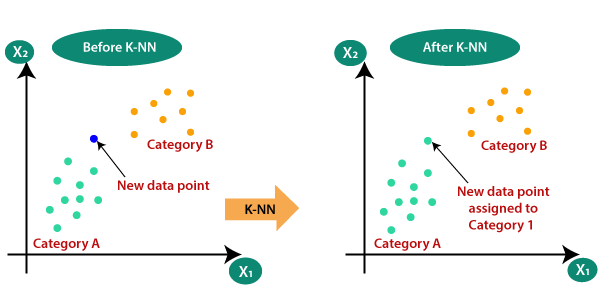

In [ ]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the random classifier algorithm

    In reality, we don't need these arguments but we are passing them to keep the function signature consistent with other classifiers

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is a random label from the training data
    """

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [ ]:
def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [ ]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def print_classification_metrics(true_labels, pred_labels):
    """
    Calculate and print classification metrics
    """
    # For multi-class, we'll use macro averaging
    precision = precision_score(true_labels, pred_labels, average='macro', zero_division=0)
    recall = recall_score(true_labels, pred_labels, average='macro', zero_division=0)
    f1 = f1_score(true_labels, pred_labels, average='macro', zero_division=0)
    accuracy = np.mean(true_labels == pred_labels)

    print(f"Accuracy:  {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall:    {recall*100:.2f}%")
    print(f"F1-Score:  {f1*100:.2f}%")

    return accuracy, precision, recall, f1

def print_regression_metrics(true_values, pred_values):
    """
    Calculate and print regression metrics
    """
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

    return mae, mse, rmse

# Example: Evaluate validation set with multiple metrics
print("=== Validation Set Classification Metrics ===")
valpred = NN(traindata, trainlabel, valdata)
print_classification_metrics(vallabel, valpred)

=== Validation Set Classification Metrics ===
Accuracy:  34.11%
Precision: 26.19%
Recall:    24.41%
F1-Score:  25.01%


(np.float64(0.34108527131782945),
 0.2618519014073886,
 0.2440802242008584,
 0.2501492638552703)

=== Confusion Matrix for Validation Set ===


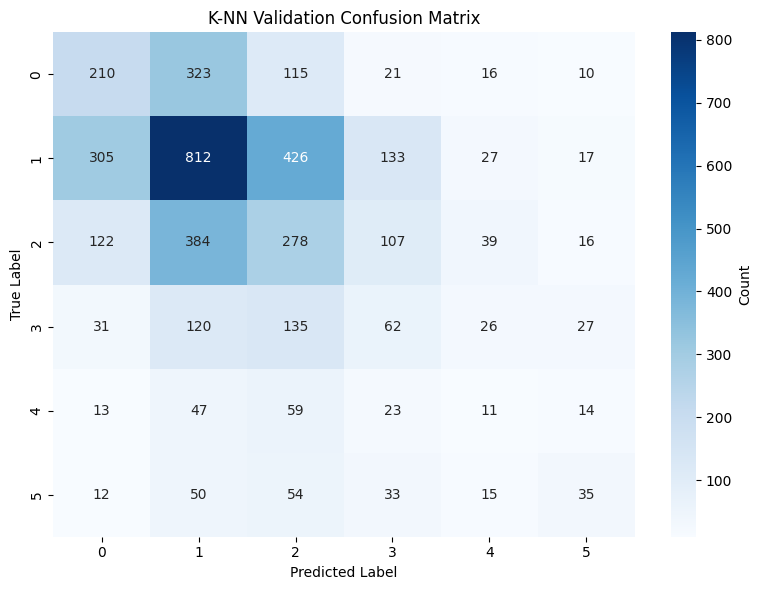

Confusion Matrix Shape: (6, 6)
Total Predictions: 4128


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(true_labels, pred_labels, title="Confusion Matrix"):
    """
    Plot confusion matrix heatmap
    """
    cm = confusion_matrix(true_labels, pred_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                cbar_kws={'label': 'Count'})
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    print(f"Confusion Matrix Shape: {cm.shape}")
    print(f"Total Predictions: {cm.sum()}")

# Visualize confusion matrix for validation predictions
print("=== Confusion Matrix for Validation Set ===")
valpred = NN(traindata, trainlabel, valdata)
plot_confusion_matrix(vallabel, valpred,
                     title="K-NN Validation Confusion Matrix")

What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.4375808538163 %


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.10852713178294 %
Validation accuracy using random classifier: 16.884689922480618 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.048257372654156 %


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 34.91795366795367 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

### Q1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

- **Nearest Neighbour Classifier (k-NN):**  
  When we **increase the validation set size**, the **training set becomes smaller**, so the model has less data to learn patterns → the **validation accuracy may decrease** due to underfitting.  
  When we **reduce the validation set size**, more data goes to training → model learns better → validation accuracy may increase slightly, but since the validation set is small, the accuracy estimate becomes **less reliable** (high variance).

- **Random Classifier:**  
  Since predictions are random, **validation accuracy remains close to random chance (e.g., ~50%)**, regardless of split size.  
  Larger validation sets give more stable accuracy (less variance), smaller ones show more fluctuation but no consistent improvement.

---

### Q2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

- **Nearest Neighbour:**  
  If the validation set is **too small**, it might not represent the overall data distribution, so validation accuracy won’t reflect true test accuracy.  
  If it’s **too large**, the model trains on too little data → poor learning → both validation and test accuracies drop.  
  A balanced split (e.g., 70–30 or 80–20) helps the validation set provide a reliable estimate of test accuracy.

- **Random Classifier:**  
  Validation accuracy will always be around the same as test accuracy (~chance level), but smaller validation sets may cause high variability in estimates.

---

### Q3. What do you think is a good percentage to reserve for the validation set so that these two factors are balanced?

- **For Nearest Neighbour:**  
  A good validation split is **20–30%**, as it provides enough data to evaluate model performance without sacrificing too much training data.

- **For Random Classifier:**  
  Since it doesn’t learn from data, the split percentage doesn’t matter much; however, using **20–30%** is still standard for consistent comparison.

---

#

,requested_val_frac,actual_val_frac,n_train,n_val,k_used,knn_train_acc,knn_val_acc,rand_train_acc,rand_val_acc
0,0.0001,0.001,999,1,3,0.9750,1.0000,0.5095,1.0000
1,0.0010,0.001,999,1,3,0.9750,1.0000,0.5055,1.0000
2,0.0100,0.010,990,10,3,0.9747,1.0000,0.4859,0.6000
3,0.0500,0.050,950,50,3,0.9758,0.9400,0.5105,0.4600
4,0.1000,0.100,900,100,3,0.9778,0.9200,0.5178,0.5100
5,0.2000,0.200,800,200,3,0.9762,0.9400,0.4750,0.4800
6,0.3000,0.300,700,300,3,0.9743,0.9467,0.4900,0.5333
7,0.5000,0.500,500,500,3,0.9700,0.9460,0.5320,0.4800
8,0.7000,0.700,300,700,3,0.9700,0.9471,0.5133,0.5243
9,0.9000,0.900,100,900,3,0.9600,0.9122,0.4300,0.5089


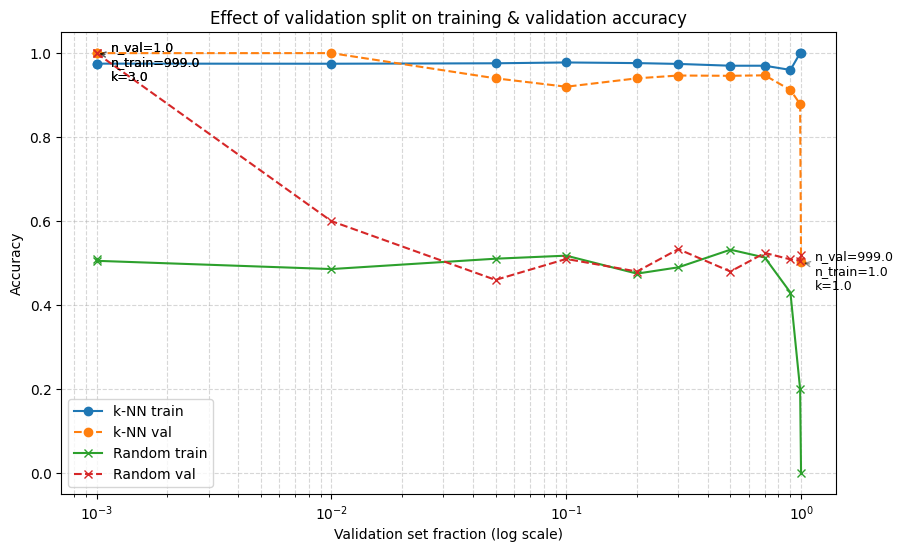

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# --- Settings ---
n_samples = 1000
random_state = 42
rng = np.random.RandomState(random_state)

# Create synthetic binary classification data
X, y = make_classification(
    n_samples=n_samples,
    n_features=5,
    n_informative=3,
    n_redundant=1,
    n_classes=2,
    random_state=random_state
)

# Validation fractions to try (includes very small and very large extremes)
requested_val_fracs = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 0.99, 0.999]

results = []

for vf in requested_val_fracs:
    # Convert fraction to an integer number of validation samples, but keep it in [1, n_samples-1]
    n_val = int(round(n_samples * vf))
    n_val = max(1, min(n_val, n_samples - 1))
    n_train = n_samples - n_val
    actual_frac = n_val / n_samples

    # Use stratify only if both sides will have at least one sample from each class
    n_classes = len(np.unique(y))
    stratify_param = y if (n_val >= n_classes and n_train >= n_classes) else None

    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=n_val, random_state=random_state, stratify=stratify_param
    )

    # Choose k so it never exceeds number of training samples (avoids ValueError)
    k = min(3, max(1, len(y_train)))  # keeps k >=1 and <= n_train

    # k-NN: try/except to be extra safe
    knn_train_acc = np.nan
    knn_val_acc = np.nan
    try:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
        knn_val_acc = accuracy_score(y_val, knn.predict(X_val))
    except Exception as e:
        print(f"Warning: k-NN failed for requested_val_frac={vf} (n_train={n_train}, n_val={n_val}). Exception: {e}")

    # Random classifier (reproducible with rng)
    y_pred_train_rand = rng.choice(np.unique(y), size=len(y_train))
    y_pred_val_rand = rng.choice(np.unique(y), size=len(y_val))
    rand_train_acc = accuracy_score(y_train, y_pred_train_rand)
    rand_val_acc = accuracy_score(y_val, y_pred_val_rand)

    results.append({
        'requested_val_frac': vf,
        'actual_val_frac': actual_frac,
        'n_train': n_train,
        'n_val': n_val,
        'k_used': k,
        'knn_train_acc': knn_train_acc,
        'knn_val_acc': knn_val_acc,
        'rand_train_acc': rand_train_acc,
        'rand_val_acc': rand_val_acc
    })

# Show results table
df = pd.DataFrame(results)
# nice ordering
df = df[['requested_val_frac', 'actual_val_frac', 'n_train', 'n_val', 'k_used',
         'knn_train_acc', 'knn_val_acc', 'rand_train_acc', 'rand_val_acc']]
pd.set_option('display.precision', 4)
display(df)

# Plot (log-scale for x so extreme small fractions are visible)
plt.figure(figsize=(10,6))
x = df['actual_val_frac'].values

plt.plot(x, df['knn_train_acc'], marker='o', label='k-NN train')
plt.plot(x, df['knn_val_acc'], marker='o', linestyle='--', label='k-NN val')
plt.plot(x, df['rand_train_acc'], marker='x', label='Random train')
plt.plot(x, df['rand_val_acc'], marker='x', linestyle='--', label='Random val')

plt.xscale('log')
plt.xlabel('Validation set fraction (log scale)')
plt.ylabel('Accuracy')
plt.title('Effect of validation split on training & validation accuracy')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)

# annotate extremes: smallest and largest actual fractions
min_frac = x.min()
max_frac = x.max()
for _, row in df.iterrows():
    if row['actual_val_frac'] in (min_frac, max_frac):
        plt.annotate(
            f"n_val={row['n_val']}\nn_train={row['n_train']}\nk={row['k_used']}",
            xy=(row['actual_val_frac'], row['knn_val_acc']),
            xytext=(10, -20),
            textcoords='offset points',
            fontsize=9,
            arrowprops=dict(arrowstyle='->', alpha=0.4)
        )

plt.show()


> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

Accuracy Comparison:
1-Nearest Neighbour Accuracy: 0.9267
3-Nearest Neighbour Accuracy: 0.9400


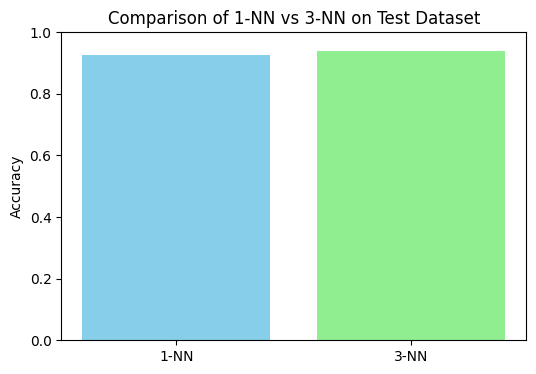

✅ The 3-NN classifier performs better, likely due to smoother decision boundaries.


In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic dataset (you can replace this with your dataset)
X, y = make_classification(
    n_samples=1000, n_features=5, n_informative=3, n_redundant=1,
    n_classes=2, random_state=42
)

# Step 2: Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 3: Initialize KNN classifiers
knn1 = KNeighborsClassifier(n_neighbors=1)
knn3 = KNeighborsClassifier(n_neighbors=3)

# Step 4: Train both models
knn1.fit(X_train, y_train)
knn3.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred_1nn = knn1.predict(X_test)
y_pred_3nn = knn3.predict(X_test)

# Step 6: Calculate accuracy
acc_1nn = accuracy_score(y_test, y_pred_1nn)
acc_3nn = accuracy_score(y_test, y_pred_3nn)

# Step 7: Print results
print("Accuracy Comparison:")
print(f"1-Nearest Neighbour Accuracy: {acc_1nn:.4f}")
print(f"3-Nearest Neighbour Accuracy: {acc_3nn:.4f}")

# Step 8: Plot comparison
plt.figure(figsize=(6,4))
plt.bar(['1-NN', '3-NN'], [acc_1nn, acc_3nn], color=['skyblue', 'lightgreen'])
plt.ylabel("Accuracy")
plt.title("Comparison of 1-NN vs 3-NN on Test Dataset")
plt.ylim(0,1)
plt.show()

# Step 9: Observation
if acc_3nn > acc_1nn:
    print("✅ The 3-NN classifier performs better, likely due to smoother decision boundaries.")
elif acc_3nn < acc_1nn:
    print("⚠️ The 1-NN classifier performs better, possibly due to overfitting by 3-NN.")
else:
    print("ℹ️ Both classifiers have equal accuracy on this dataset.")


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>cross-validation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [ ]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """
    This function takes in the data, labels, split percentage, number of iterations and classifier function
    and returns the average accuracy of the classifier

    alldata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    alllabel: numpy array of shape (n,) where n is the number of samples
    splitpercent: float which is the percentage of data to be used for training
    iterations: int which is the number of iterations to run the classifier
    classifier: function which is the classifier function to be used

    returns: the average accuracy of the classifier
    """
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [ ]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 33.58463539517022 %
Test accuracy: 34.91795366795367 %


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


###  Answers

#### Q1. Does averaging the validation accuracy across multiple splits give more consistent results?
Yes   
Averaging validation accuracy over multiple random train–validation splits (like in k-fold cross-validation) reduces the effect of any single lucky or unlucky split.  
This leads to more consistent and stable estimates of model performance, because the random variations in data splits tend to cancel each other out.

---

#### Q2. Does it give a more accurate estimate of test accuracy?
Yes  
Averaging across multiple splits generally gives a closer estimate of true test accuracy.  
By training and validating on different subsets of the data, the model is exposed to more diverse samples, providing a **better generalization estimate than relying on a single split.

---

#### Q3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
- Increasing the number of iterations (or folds) reduces variance in the accuracy estimate.  
- More iterations mean the model is evaluated on more data combinations, producing a smoother, more reliable accuracy curve.  
- However, beyond a certain point, gains become marginal while computation time increases.
Yes — up to a limit, higher iterations give better, more stable estimates.

---

#### Q4. Can we deal with a very small train dataset or validation dataset by increasing the iterations?
Partially  
Repeating validation with multiple splits allows every sample to be used for both training and validation at different times.  
This helps maximize the use of limited data and provides a fair performance estimate.

However:
- It does not actually increase the size of your training data.  
- The model still learns from small samples each time.  
- So while more iterations improve the reliability of accuracy estimation, they cannot fully compensate for having too little data.

More iterations → better estimates,  
but not a substitute for more training data.


> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

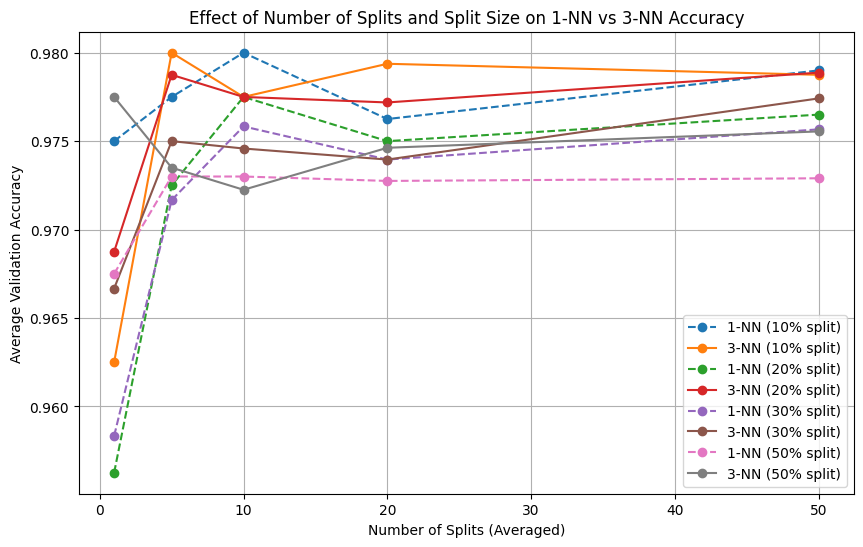

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Create synthetic dataset
X, y = make_classification(
    n_samples=800, n_features=5, n_informative=3, n_redundant=1,
    n_classes=2, random_state=42
)

# Step 2: Experiment parameters
split_sizes = [0.1, 0.2, 0.3, 0.5]   # different validation/test split ratios
iterations = [1, 5, 10, 20, 50]      # number of repeated splits

# Step 3: Store results
results = []

for test_size in split_sizes:
    for n_iter in iterations:
        acc_1nn, acc_3nn = [], []

        for i in range(n_iter):
            X_train, X_val, y_train, y_val = train_test_split(
                X, y, test_size=test_size, random_state=i
            )

            # 1-NN
            knn1 = KNeighborsClassifier(n_neighbors=1)
            knn1.fit(X_train, y_train)
            acc_1nn.append(accuracy_score(y_val, knn1.predict(X_val)))

            # 3-NN
            knn3 = KNeighborsClassifier(n_neighbors=3)
            knn3.fit(X_train, y_train)
            acc_3nn.append(accuracy_score(y_val, knn3.predict(X_val)))

        results.append({
            'test_size': test_size,
            'iterations': n_iter,
            'acc_1nn': np.mean(acc_1nn),
            'acc_3nn': np.mean(acc_3nn)
        })

# Step 4: Convert to numpy arrays for plotting
split_labels = [str(int(s*100)) + "%" for s in split_sizes]

plt.figure(figsize=(10,6))

for test_size, label in zip(split_sizes, split_labels):
    x_iters = [r['iterations'] for r in results if r['test_size'] == test_size]
    y_1nn = [r['acc_1nn'] for r in results if r['test_size'] == test_size]
    y_3nn = [r['acc_3nn'] for r in results if r['test_size'] == test_size]

    plt.plot(x_iters, y_1nn, 'o--', label=f"1-NN ({label} split)")
    plt.plot(x_iters, y_3nn, 'o-', label=f"3-NN ({label} split)")

plt.xlabel("Number of Splits (Averaged)")
plt.ylabel("Average Validation Accuracy")
plt.title("Effect of Number of Splits and Split Size on 1-NN vs 3-NN Accuracy")
plt.legend()
plt.grid(True)
plt.show()


###  **Observation**

1. **Effect of Number of Splits:**
   - For both **1-NN** and **3-NN**, the average validation accuracy becomes **more stable** as the number of random splits (iterations) increases.  
   - With fewer splits, accuracy may fluctuate due to random data selection.  
   - Averaging over more splits smoothens the results and gives a **more reliable estimate** of model performance.

2. **Effect of Split Size (Train vs Validation Ratio):**
   - **Smaller validation size (e.g., 10%)** → more data for training → typically **higher accuracy** but less reliable estimates (more variance).  
   - **Larger validation size (e.g., 50%)** → less data for training → accuracy may drop but estimates become more **stable**.

3. **Comparison between 1-NN and 3-NN:**
   - **1-NN** tends to overfit the training data and is more sensitive to noise — hence its accuracy fluctuates more.  
   - **3-NN** provides **smoother and slightly higher accuracy** since it averages the influence of 3 nearest neighbors.  
   - Across most splits and iterations, **3-NN performs more consistently** than 1-NN.

**Conclusion:**  
- Increasing the number of splits gives a more stable estimate of accuracy.  
- A moderate validation split (20–30%) gives a good balance between training and validation reliability.  
- **3-NN** generally outperforms **1-NN** in both stability and accuracy.
